# AMAZON SENTIMENT ANALYSIS

In [2]:
import pandas as pd

df = pd.read_csv("Reviews_new.csv", low_memory=False)

In [3]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ConvertedDate,Summary,...,ReviewLength,SummaryLength,UserReviewCount,FiveStarFrequency,IsPerfect,ReviewYear,ReviewMonth,ReviewDay,AverageScorePerUser,DailyReviewRate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,4/27/2011,Good Quality Dog Food,...,263,21,1,1,1,2011,4,27,5.000000,1.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,9/7/2012,Not as Advertised,...,190,17,1,0,0,2012,9,7,1.000000,1.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,8/18/2008,"""Delight"" says it all",...,509,21,3,1,0,2008,8,18,4.333333,0.001585
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,6/13/2011,Cough Medicine,...,219,14,3,0,0,2011,6,13,2.000000,3.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,10/21/2012,Great taffy,...,140,11,2,2,1,2012,10,21,5.000000,0.004914


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ConvertedDate', 'Summary',
       'Text', 'CleanedText', 'InvalidHelpfulness', 'ReviewLength',
       'SummaryLength', 'UserReviewCount', 'FiveStarFrequency', 'IsPerfect',
       'ReviewYear', 'ReviewMonth', 'ReviewDay', 'AverageScorePerUser',
       'DailyReviewRate'],
      dtype='object')

In [5]:
!pip install textblob

In [6]:
!pip install tqdm

In [7]:
from textblob import TextBlob
from tqdm import tqdm

tqdm.pandas()

def get_sentiment(text):
    text_str = str(text) 
    if not text_str or text_str.lower() == 'nan':
        return 0 
    return TextBlob(text_str).sentiment.polarity

print("----Sentiment analysis----")

#Calculating Sentiment for Summary Column
print("----Summaries----")
df['SummarySentiment'] = df['Summary'].progress_apply(get_sentiment)
print("Summary Sentiment calculated.")

#Calculating Sentiment for CleanedText Column
print("----Cleaned Text----")
df['TextSentiment'] = df['CleanedText'].progress_apply(get_sentiment)
print("Text Sentiment calculated.")

print("\nSample Results:")
print(df[['Score', 'Summary', 'SummarySentiment', 'CleanedText', 'TextSentiment']].head())

----Sentiment analysis----
----Summaries----


100%|██████████| 567244/567244 [01:34<00:00, 6014.21it/s]


Summary Sentiment calculated.
----Cleaned Text----


100%|██████████| 567244/567244 [05:24<00:00, 1747.81it/s]

Text Sentiment calculated.

Sample Results:
   Score                Summary  SummarySentiment  \
0      5  Good Quality Dog Food               0.7   
1      1      Not as Advertised               0.0   
2      4  "Delight" says it all               0.0   
3      2         Cough Medicine               0.0   
4      5            Great taffy               0.8   

                                         CleanedText  TextSentiment  
0  i have bought several of the vitality canned d...       0.450000  
1  product arrived labeled as jumbo salted peanut...      -0.033333  
2  this is a confection that has been around a fe...       0.133571  
3  if you are looking for the secret ingredient i...       0.166667  
4  great taffy at a great price. there was a wide...       0.483333  


In [8]:
#Calculating max reviews per day

# Group by User and Date, this  counts how many reviews the user posted on that specific date
daily_counts = df.groupby(['UserId', 'ConvertedDate']).size().reset_index(name='Max_Daily_Reviews')

#left merge to keep all original rows
df = df.merge(daily_counts, on=['UserId', 'ConvertedDate'], how='left')

print("\nSample of result:")
print(df[['UserId', 'ConvertedDate', 'Max_Daily_Reviews']].head())


Sample of result:
           UserId ConvertedDate  Max_Daily_Reviews
0  A3SGXH7AUHU8GW     4/27/2011                  1
1  A1D87F6ZCVE5NK      9/7/2012                  1
2   ABXLMWJIXXAIN     8/18/2008                  1
3  A395BORC6FGVXV     6/13/2011                  3
4  A1UQRSCLF8GW1T    10/21/2012                  1


In [9]:
df.to_csv("Reviews_Full_Sentiment.csv", index=False)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Reviews_Full_Sentiment.csv", low_memory=False)

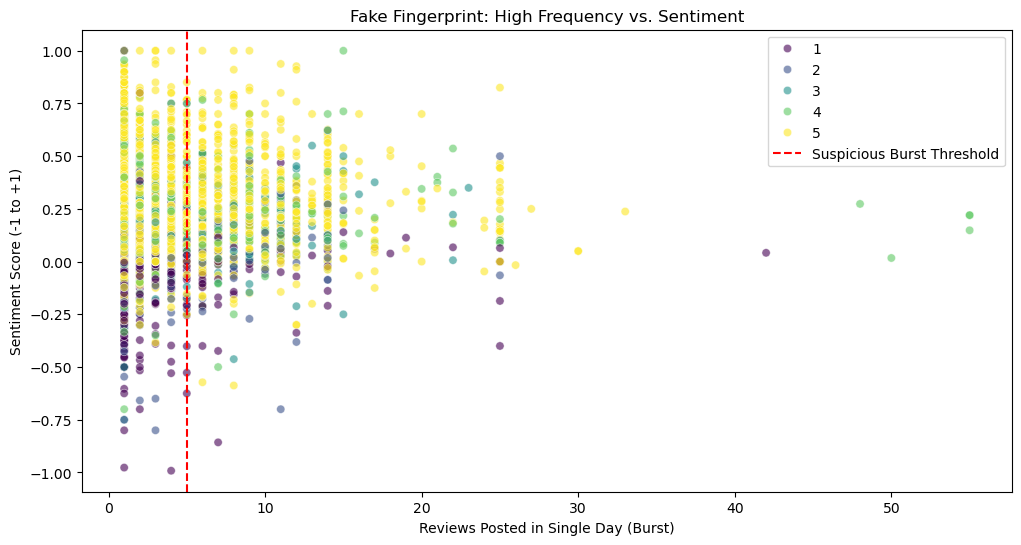

In [11]:
# Sampling 5000 data points to see results
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df.sample(5000), 
    x='Max_Daily_Reviews', 
    y='TextSentiment', 
    hue='Score',
    palette='viridis',
    alpha=0.6
)

plt.title("Fake Fingerprint: High Frequency vs. Sentiment")
plt.xlabel("Reviews Posted in Single Day (Burst)")
plt.ylabel("Sentiment Score (-1 to +1)")
plt.axvline(x=5, color='red', linestyle='--', label='Suspicious Burst Threshold')
plt.legend()
plt.show()

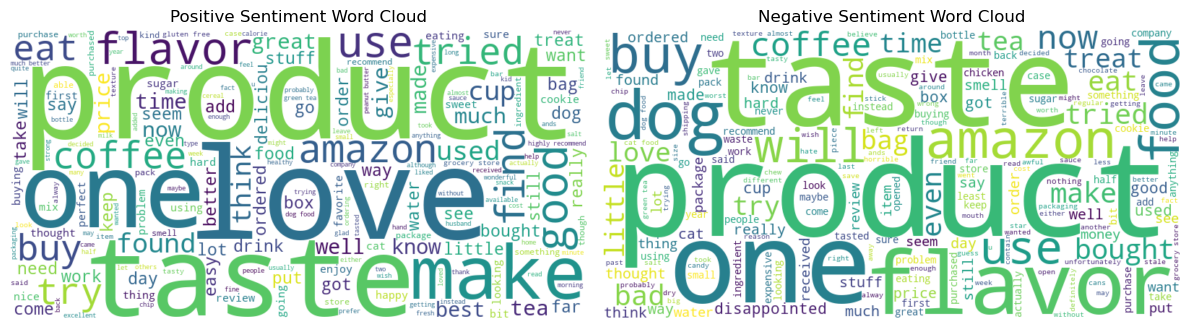

In [12]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

def remove_br(text):
    text = str(text)
    text = re.sub(r'<.*?>', ' ', text)        
    text = re.sub(r'\bbr\b', ' ', text)        
    text = text.replace("br", " ")             
    return text

df['CleanedText_NoBR'] = df['CleanedText'].apply(remove_br)

positive_text = " ".join(df[df['TextSentiment'] > 0]['CleanedText_NoBR'].astype(str))
negative_text = " ".join(df[df['TextSentiment'] < 0]['CleanedText_NoBR'].astype(str))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Positive Sentiment Word Cloud")

if positive_text.strip():
    wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.axis("off")
else:
    plt.text(0.5, 0.5, "No positive text", ha='center', va='center')
    plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative Sentiment Word Cloud")

if negative_text.strip():
    wc_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis("off")
else:
    plt.text(0.5, 0.5, "No negative text", ha='center', va='center')
    plt.axis("off")

plt.tight_layout()
plt.show()